In [1]:
from pythtb import TBModel, Lattice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat_vecs = [[1, 0], [1 / 2, np.sqrt(3) / 2]]
# define coordinates of orbitals
orb_vecs = [[1 / 3, 1 / 3], [2 / 3, 2 / 3]]

In [3]:
lat = Lattice(lat_vecs=lat_vecs, orb_vecs=orb_vecs, periodic_dirs=[0, 1])
print(lat)

----------------------------------------
       Lattice structure report         
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
periodic directions         = [0, 1]
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000]
  # 1 ===> [ 0.500,  0.866]
Volume of unit cell (Cartesian) = 0.866 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283, -3.628]
  # 1 ===> [ 0.000,  7.255]
Volume of reciprocal unit cell = 45.586 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.500,  0.289]
  # 1 ===> [ 1.000,  0.577]

Orbital vectors (fractional):
  # 0 ===> [ 0.333,  0.333]
  # 1 ===> [ 0.667,  0.667]
----------------------------------------


In [4]:
my_model = TBModel(lattice=lat, spinful=False)

In [5]:
delta = 0.2
t = -1.0
t2 = 0.15 * np.exp(1j * np.pi / 2)
t2c = t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2, 0, 0, [1, 0])
my_model.set_hop(t2, 1, 1, [1, -1])
my_model.set_hop(t2, 1, 1, [0, 1])
my_model.set_hop(t2c, 1, 1, [1, 0])
my_model.set_hop(t2c, 0, 0, [1, -1])
my_model.set_hop(t2c, 0, 0, [0, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
periodic directions         = [0, 1]
spinful                     = False
number of spin components   = 1
number of electronic states = 2
number of orbitals          = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000,  0.000]
  # 1 ===> [ 0.500,  0.866]
Volume of unit cell (Cartesian) = 0.866 [A^d]

Reciprocal lattice vectors (Cartesian):
  # 0 ===> [ 6.283, -3.628]
  # 1 ===> [ 0.000,  7.255]
Volume of reciprocal unit cell = 45.586 [A^-d]

Orbital vectors (Cartesian):
  # 0 ===> [ 0.500,  0.289]
  # 1 ===> [ 1.000,  0.577]

Orbital vectors (fractional):
  # 0 ===> [ 0.333,  0.333]
  # 1 ===> [ 0.667,  0.667]
----------------------------------------
Site energies:
  < 0 | H | 0 > = -0.200 
  < 1 | H | 1 > =  0.200 
Hoppings:
  < 0 | H | 1  + [ 0.0 ,  0.0 ] > = -1.0000+0.0000j
  < 1 | H | 0  + [ 1.0 , 

In [6]:
path = [
    [0, 0],
    [2 / 3, 1 / 3],
    [1 / 2, 1 / 2],
    [1 / 3, 2 / 3],
    [0, 0],
]
# labels of the nodes
label = (r"$\Gamma $", r"$K$", r"$M$", r"$K^\prime$", r"$\Gamma $")

# call function k_path to construct the actual path
(k_vec, k_dist, k_node) = my_model.k_path(path, 101)

In [7]:
evals = my_model.solve_ham(k_vec)

In [8]:
from pythtb import Mesh

mesh = Mesh(dim_k=2, axis_types=["k", "k"])
# create a 50x50 grid of k-points
mesh.build_grid(shape=(50, 50))
# get the flattened list of k-points
kpts = mesh.flat

In [9]:
energies = my_model.solve_ham(kpts)
energies = energies.flatten()

Text(0, 0.5, 'Number of states')

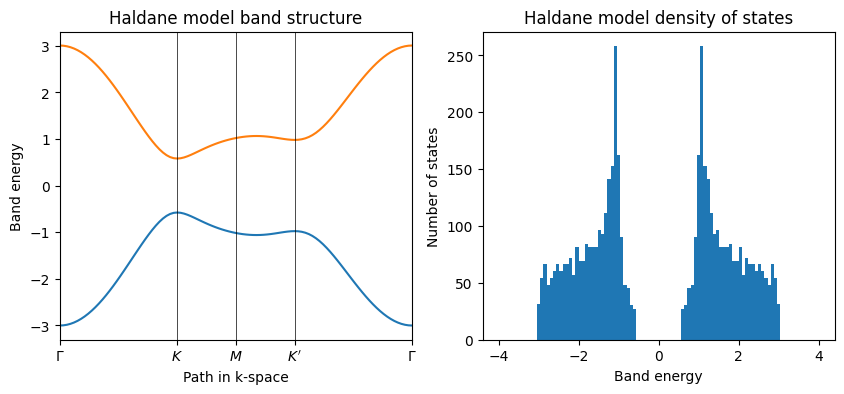

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(k_dist, evals)
ax[0].set_xlim(k_node[0], k_node[-1])
# put tickmarks and labels at node positions
ax[0].set_xticks(k_node)
ax[0].set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
    ax[0].axvline(x=k_node[n], linewidth=0.5, color="k")
# put title
ax[0].set_title("Haldane model band structure")
ax[0].set_xlabel("Path in k-space")
ax[0].set_ylabel("Band energy")

# now plot density of states
ax[1].hist(energies, 100, range=(-4.0, 4.0))
# ax[1].set_ylim(0.0, 80.0)
ax[1].set_title("Haldane model density of states")
ax[1].set_xlabel("Band energy")
ax[1].set_ylabel("Number of states")

In [11]:
fin_model_true = my_model.make_finite([0, 1], [20, 20], glue_edges=[True, True])
evals_true = fin_model_true.solve_ham()

fin_model_false = my_model.make_finite([0, 1], [20, 20], glue_edges=[False, False])
evals_false = fin_model_false.solve_ham()

Text(0, 0.5, 'Number of states')

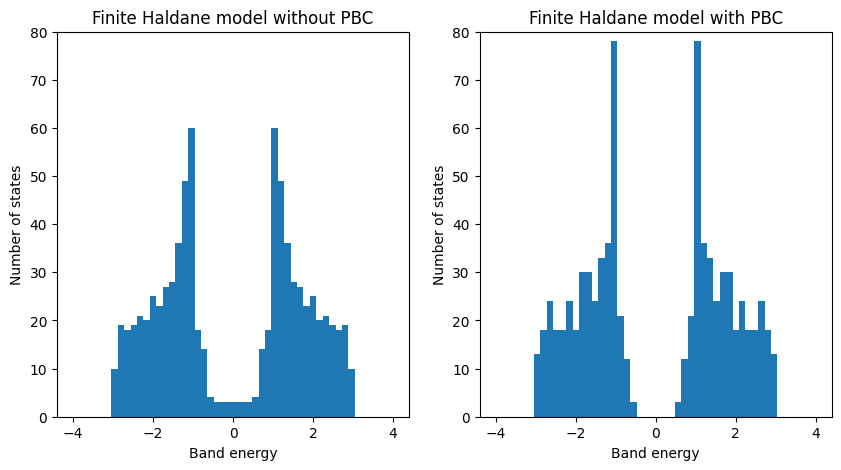

In [12]:
# flatten eigenvalue arrays
evals_false = evals_false.flatten()
evals_true = evals_true.flatten()

# now plot density of states
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(evals_false, 50, range=(-4.0, 4.0))
ax[0].set_ylim(0.0, 80.0)
ax[0].set_title("Finite Haldane model without PBC")
ax[0].set_xlabel("Band energy")
ax[0].set_ylabel("Number of states")

ax[1].hist(evals_true, 50, range=(-4.0, 4.0))
ax[1].set_ylim(0.0, 80.0)
ax[1].set_title("Finite Haldane model with PBC")
ax[1].set_xlabel("Band energy")
ax[1].set_ylabel("Number of states")